K-Nearest Neighboues (KNN) op de CRUNCHR data

Wat is K-Nearest Neighbors (KNN)?

K-Nearest Neighbors (KNN) is een simpel machine learning algoritme dat voorspellingen maakt door te kijken naar de "dichtstbijzijnde buren". Stel je wilt weten wat een piloot zou moeten verdienen, KNN zoekt dan naar een aantal piloten die qua kenmerken het meest lijken op de nieuwe piloot en neemt hun gemiddelde salaris als schatting.

Het aantal buren dat je kiest is belangrijk: het bepaalt hoe gedetailleerd of gegeneraliseerd je voorspelling is. KNN werkt goed bij eenvoudige, overzichtelijke data en maakt gebruik van de afstand tussen punten om te bepalen wie de "naaste buren" zijn. 

De prestaties van het model worden beoordeeld aan de hand van de volgende maatstaven:

Mean Squared Error (MSE):

De MSE is een maat voor de gemiddelde kwadratische fout tussen de werkelijke en voorspelde salarissen. 

R² is een maat voor hoe goed het model de variatie in de data verklaart. 

In [8]:
#Eerst pandas importeren om er mee te werken
import pandas as pd

#Importeren numpy
import numpy as np

#Importern van mattplotlib 
import matplotlib.pyplot as plt

# maak een dataframe van het bestand data.csv en splits de data per ;
df = pd.read_csv('data.csv')

In [9]:
print(df)

      First name       Last name            Position title  \
0        Viviana  's Gravensande           Sales Associate   
1         Carrol  's Gravensande         Financial Analyst   
2         Amalie  's Gravensande         Financial Analyst   
3      Viridiana  's Gravensande    Airport Services Agent   
4          Shara  's Gravensande    Communications Officer   
...          ...             ...                       ...   
27280   Danyelle         Étienne           Airline Captain   
27281   Mechelle         Étienne          Flight Attendant   
27282      Rhoda         Étienne  Cargo Operations Officer   
27283     Colvin         Étienne             Sales Manager   
27284       Erik         Étienne                      Cook   

                      Full name        Age  Base pay (full-time)  \
0        Viviana 's Gravensande  31.166667          29989.765171   
1         Carrol 's Gravensande  44.666667          70506.994176   
2         Amalie 's Gravensande  37.250000         

KNN toepassen op verschillende x waardes om te kijken of er relavante verbanden tussen zitten


Mean Squared Error (MSE): 820119696.90
R-squared (R²): 0.24


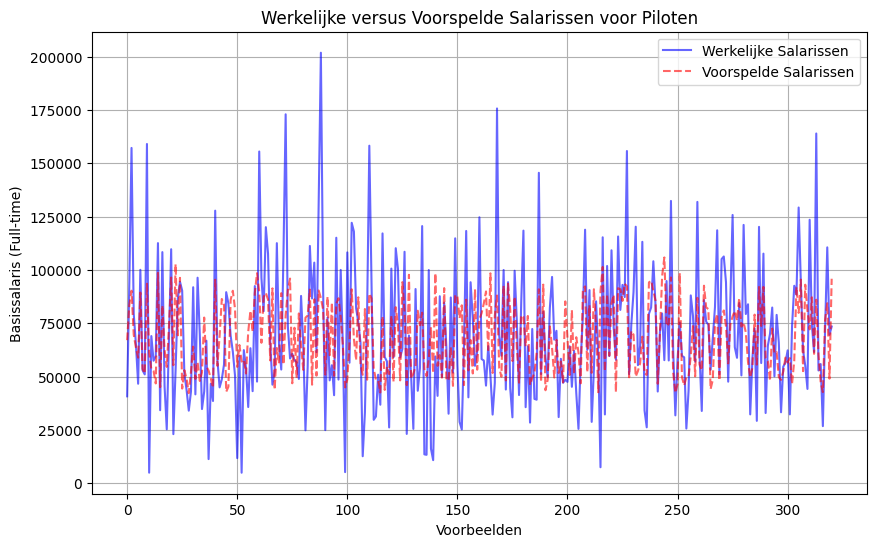

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# maak df voor piloten
piloten_df = df[df['Functional area level 2'] == 'Pilots'][['Position grade', 'Base pay (full-time)', 'Age', 'Years of service']].dropna()

# Controleer of er rijen zijn in de df
if piloten_df.empty:
    print("Geen rijen")
else:
    # Maak een x en een y
    X = piloten_df[['Position grade', 'Age', 'Years of service']]
    y = piloten_df['Base pay (full-time)']

    # Verdeel de X en Y in trainingsets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Train het KNN model
    knn = KNeighborsRegressor(n_neighbors=20)
    knn.fit(X_train, y_train)

    #Verspel salaris op de testset
    y_pred = knn.predict(X_test)

    #KNN model evalueren met MSE en R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #Print gevonden resultaten
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")

    #Visualisatie van voorspelde en werkelijke waardes.
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, color='blue', label='Werkelijke Salarissen', alpha=0.6)
    plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed', label='Voorspelde Salarissen', alpha=0.6)
    plt.title('Werkelijke versus Voorspelde Salarissen voor Piloten')
    plt.xlabel('Voorbeelden')
    plt.ylabel('Basissalaris (Full-time)')
    plt.legend()
    plt.grid(True)
    plt.show()


In deze grafiek zie je de werkelijke salarissen (blauwe lijn) en de voorspelde salarissen (rode stippellijn) voor piloten. De lijnen liggen ver uit elkaar, wat betekent dat het model moeite heeft om de salarissen nauwkeurig te voorspellen. Dit wordt ook bevestigd door de lage R²-waarde van 0.24, wat aangeeft dat slechts 24% van de variatie in de werkelijke salarissen door het model verklaard wordt. Kortom, dit model biedt geen sterke voorspelling voor het salaris van piloten.